# IC50 value regression with XGBoost


----

- Cross validation using the 'train' data

- Using all observations (all species, </=/> values too)

- simple one-hot encoding scheme for all categorical variables (species, hla type,sequence)

- This is the best i can do now


----

In [1]:
import os,sys

#my functions
sys.path.append('../')
from utils import load_data,my_xgb_cv_predict,corr_plot

#go to working dir
work_dir='/data/data1/ribli/mhc/'
os.chdir(work_dir)

%matplotlib inline

Using Theano backend.


### Load data

In [2]:
x_train,y_train,y_train_c,x_test,y_test,y_test_c=load_data(
    hla_representation='one-hot',
    species_representation='one-hot',
    seq_representation='one-hot')

Reading from file...
Creating representation...
Using  137654  training data points
Using  27680  testing data points
Done, It took: 7.35857200623 s


### Use all data

In [8]:
import numpy as np
all_x=np.concatenate([x_train,x_test],axis=0)
all_y=np.concatenate([y_train,y_test],axis=0)

rng=np.random.RandomState(42)
perm=rng.permutation(len(all_y))
x=all_x[perm]
y=all_y[perm]

### Train with cross validation

In [10]:
#model params
params = {'max_depth':20,
         'eta':0.05,
         'min_child_weight':5,
         'colsample_bytree':1,
         'subsample':1,
         'silent':1,
         'objective': "reg:linear",
         'eval_metric': 'rmse',
         'nthread':4}

y_pred=my_xgb_cv_predict(params,x,y,n_folds=5)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:3.105378	eval-rmse:3.108051
[500]	train-rmse:0.458330	eval-rmse:0.777373
[1000]	train-rmse:0.334963	eval-rmse:0.759490
[1500]	train-rmse:0.269906	eval-rmse:0.756317
Stopping. Best iteration:
[1690]	train-rmse:0.249282	eval-rmse:0.755899

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:3.102580	eval-rmse:3.102369
[500]	train-rmse:0.456532	eval-rmse:0.778654
[1000]	train-rmse:0.334856	eval-rmse:0.761537
[1500]	train-rmse:0.260972	eval-rmse:0.757728
Stopping. Best iteration:
[1733]	train-rmse:0.237252	eval-rmse:0.757253

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:3.105199	eval-rmse:3.101992
[500]	train-rmse:0.451321	eval-rmse:0.790833
[1000]	train-rmse:0.334225	eval-rmse:0.776135
[1500]	train-rmse:0.264836	eval-rmse:0.772911
[2000]	train-rmse:0.219778	eval-rmse:0.772513
Stopping. Best iteration:
[1959]	train-rmse:0.222516	eval-rmse:0.772478

Will train unti

### Plot correlation

Correlation: 0.820784395706


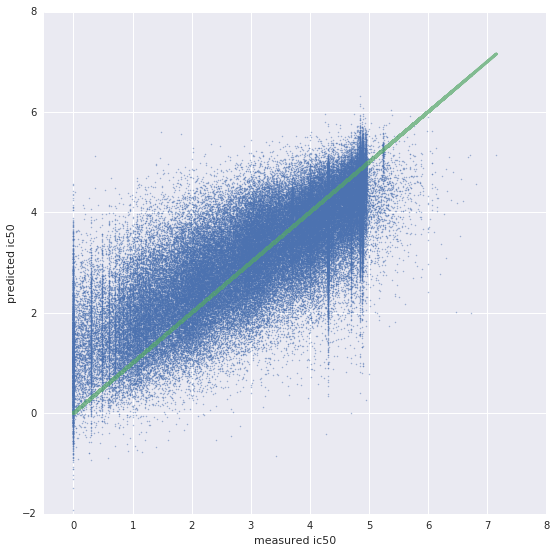

In [12]:
corr_plot(y,y_pred)